***Importamos las librerias necesarias***

In [160]:
import pandas as pd
import numpy as np
import missingno as msno
import sqlalchemy as db
from sqlalchemy import create_engine

***Cargamos el archivo CSV***

In [161]:
aviones = pd.read_csv('AccidentesAviones.csv')

***Vemos cuantas filas y columnas tiene el archivo***

In [162]:
aviones.shape

(5008, 18)

***Visualizamos los faltantes***

<AxesSubplot:>

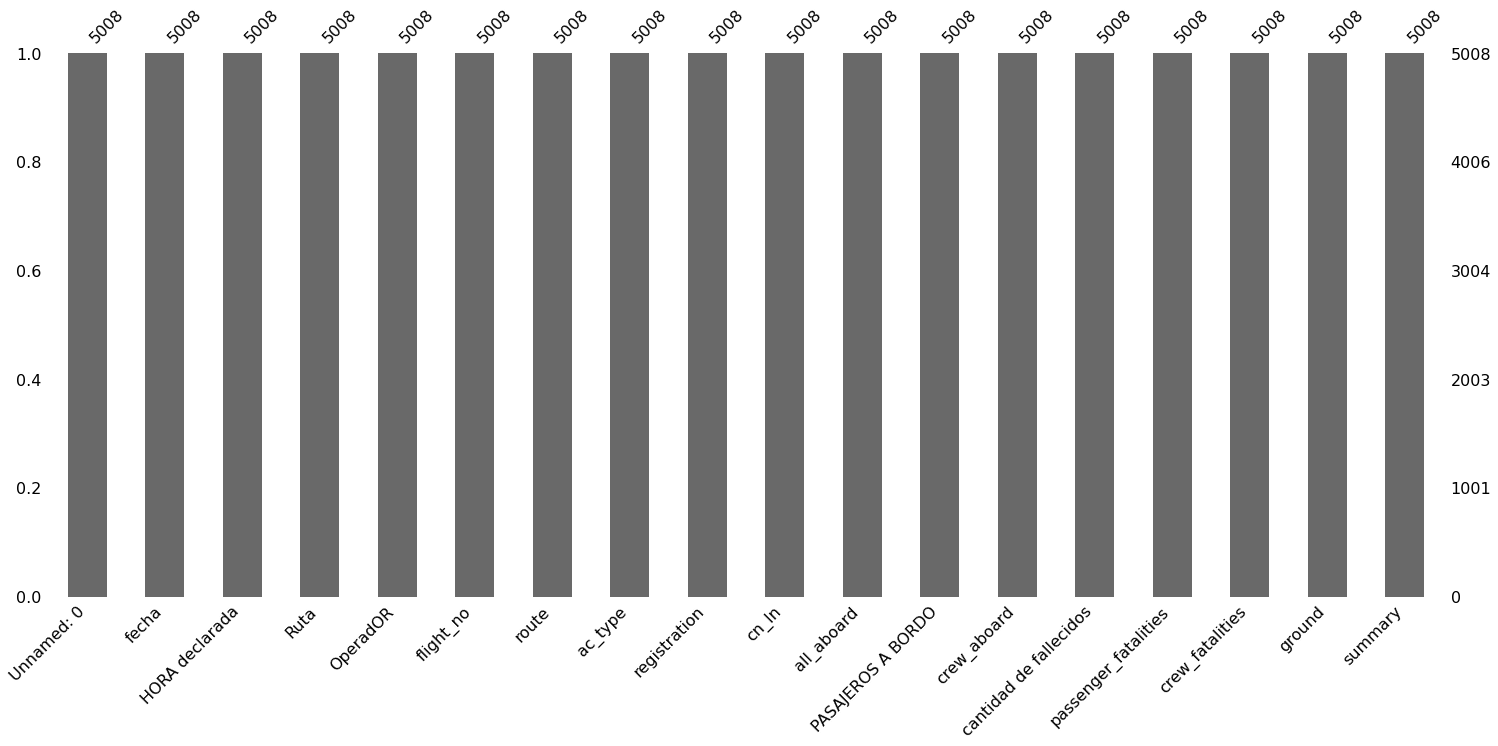

In [163]:
msno.bar(aviones)

***Vemos la primeras filas***

In [164]:
aviones.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


***Normalizamos la columna de hora declarada***

In [165]:
def normalizar_hora(valor):
    valor = valor.replace('c', '')
    valor = valor.replace('Z', '')
    valor = valor.replace('c:', '')
    valor = valor.replace('?', '00:00')
    valor = valor.replace(' ', '')
    valor = valor.replace(':', '')
    valor = valor.replace(';', '')
    if ':' not in valor:
        return valor
    elif valor[0] == ':':
        return f'00 {valor}'
    elif valor[-1] == ':':
        return f'{valor}00'
    elif len(valor) == 4:
        return '0' + valor
    else:
        return valor 

aviones['HORA declarada'] = aviones['HORA declarada'].apply(lambda x: normalizar_hora(x))

In [166]:
aviones['HORA declarada'] = pd.to_datetime(aviones['HORA declarada'], format = '%H%M').dt.time


***Cambiamos la fecha***

In [167]:
aviones['fecha'] = pd.to_datetime(aviones['fecha'])
aviones.dtypes

Unnamed: 0                         int64
fecha                     datetime64[ns]
HORA declarada                    object
Ruta                              object
OperadOR                          object
flight_no                         object
route                             object
ac_type                           object
registration                      object
cn_ln                             object
all_aboard                        object
PASAJEROS A BORDO                 object
crew_aboard                       object
cantidad de fallecidos            object
passenger_fatalities              object
crew_fatalities                   object
ground                            object
summary                           object
dtype: object

In [168]:
aviones['OperadOR'] = aviones['OperadOR'].replace('?' , 'Military - German Navy')

In [169]:
aviones = aviones.replace('?', 'Sin Dato')

***Eliminamos la columna Unnamed***

In [170]:
aviones = aviones.drop(['Unnamed: 0'], axis = 1)

***Verificamos si se elimino la columna***

In [171]:
aviones.head(20)

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Sin Dato,Demonstration,Wright Flyer III,Sin Dato,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,00:00:00,"Juvisy-sur-Orge, France",Military - German Navy,Sin Dato,Air show,Wright Byplane,SC1,Sin Dato,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Sin Dato,Test flight,Dirigible,Sin Dato,Sin Dato,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,00:00:00,"Victoria, British Columbia, Canada",Private,Sin Dato,Sin Dato,Curtiss seaplane,Sin Dato,Sin Dato,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,Sin Dato,Sin Dato,Zeppelin L-1 (airship),Sin Dato,Sin Dato,20,Sin Dato,Sin Dato,14,Sin Dato,Sin Dato,0,The airship flew into a thunderstorm and encou...
5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,Sin Dato,Sin Dato,Zeppelin L-2 (airship),Sin Dato,Sin Dato,28,Sin Dato,Sin Dato,28,Sin Dato,Sin Dato,0,Hydrogen gas which was being vented was sucked...
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,Sin Dato,Sin Dato,Zeppelin L-8 (airship),Sin Dato,Sin Dato,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,Sin Dato,Sin Dato,Zeppelin L-10 (airship),Sin Dato,Sin Dato,19,Sin Dato,Sin Dato,19,Sin Dato,Sin Dato,0,"Exploded and burned near Neuwerk Island, when..."
8,1916-07-28,00:00:00,"Near Jambol, Bulgeria",Military - German Army,Sin Dato,Sin Dato,Schutte-Lanz S-L-10 (airship),Sin Dato,Sin Dato,20,Sin Dato,Sin Dato,20,Sin Dato,Sin Dato,0,"Crashed near the Black Sea, cause unknown."
9,1916-09-24,01:00:00,"Billericay, England",Military - German Navy,Sin Dato,Sin Dato,Zeppelin L-32 (airship),Sin Dato,Sin Dato,22,Sin Dato,Sin Dato,22,Sin Dato,Sin Dato,0,Shot down by British aircraft crashing in flames.


In [172]:
aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          5008 non-null   object        
 2   Ruta                    5008 non-null   object        
 3   OperadOR                5008 non-null   object        
 4   flight_no               5008 non-null   object        
 5   route                   5008 non-null   object        
 6   ac_type                 5008 non-null   object        
 7   registration            5008 non-null   object        
 8   cn_ln                   5008 non-null   object        
 9   all_aboard              5008 non-null   object        
 10  PASAJEROS A BORDO       5008 non-null   object        
 11  crew_aboard             5008 non-null   object        
 12  cantidad de fallecidos  5008 non-null   object  

***Revisando los nombre de las columnas***

In [173]:
aviones.columns

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route',
       'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

***Cambiamos los nombres de las columnas en Mayusculas al comienzo seguido de las minusculas***

In [174]:
aviones.columns = ['Fecha', 'Hora declarada', 'Ruta', 'Operador', 'Numero vuelo', 'Itinerario','Tipo aeronave', 'Matricula', 'Serie fabricacion', 'Personas abordo', 'Pasajeros a bordo',
       'Tripulacion abordo', 'Cantidad de fallecidos', 'Pasajeros fallecidos','Tripulacion fallecidos', 'Fallecidos en tierra', 'Resumen accidentes']
aviones.columns

Index(['Fecha', 'Hora declarada', 'Ruta', 'Operador', 'Numero vuelo',
       'Itinerario', 'Tipo aeronave', 'Matricula', 'Serie fabricacion',
       'Personas abordo', 'Pasajeros a bordo', 'Tripulacion abordo',
       'Cantidad de fallecidos', 'Pasajeros fallecidos',
       'Tripulacion fallecidos', 'Fallecidos en tierra', 'Resumen accidentes'],
      dtype='object')

***Revisamos los cambios de los nombres de las columnas***

In [175]:
aviones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   5008 non-null   datetime64[ns]
 1   Hora declarada          5008 non-null   object        
 2   Ruta                    5008 non-null   object        
 3   Operador                5008 non-null   object        
 4   Numero vuelo            5008 non-null   object        
 5   Itinerario              5008 non-null   object        
 6   Tipo aeronave           5008 non-null   object        
 7   Matricula               5008 non-null   object        
 8   Serie fabricacion       5008 non-null   object        
 9   Personas abordo         5008 non-null   object        
 10  Pasajeros a bordo       5008 non-null   object        
 11  Tripulacion abordo      5008 non-null   object        
 12  Cantidad de fallecidos  5008 non-null   object  

***Abrimos el nuevo dataset buscado en base de datos***

In [176]:
aviones02 = pd.read_csv('accidentes.csv')

***Vemos cuantas filas y columnas tiene el archivo***

In [177]:
aviones02.shape 

(5686, 13)

***Visualizamos cuantas columnas tienen valores faltantes***

<AxesSubplot:>

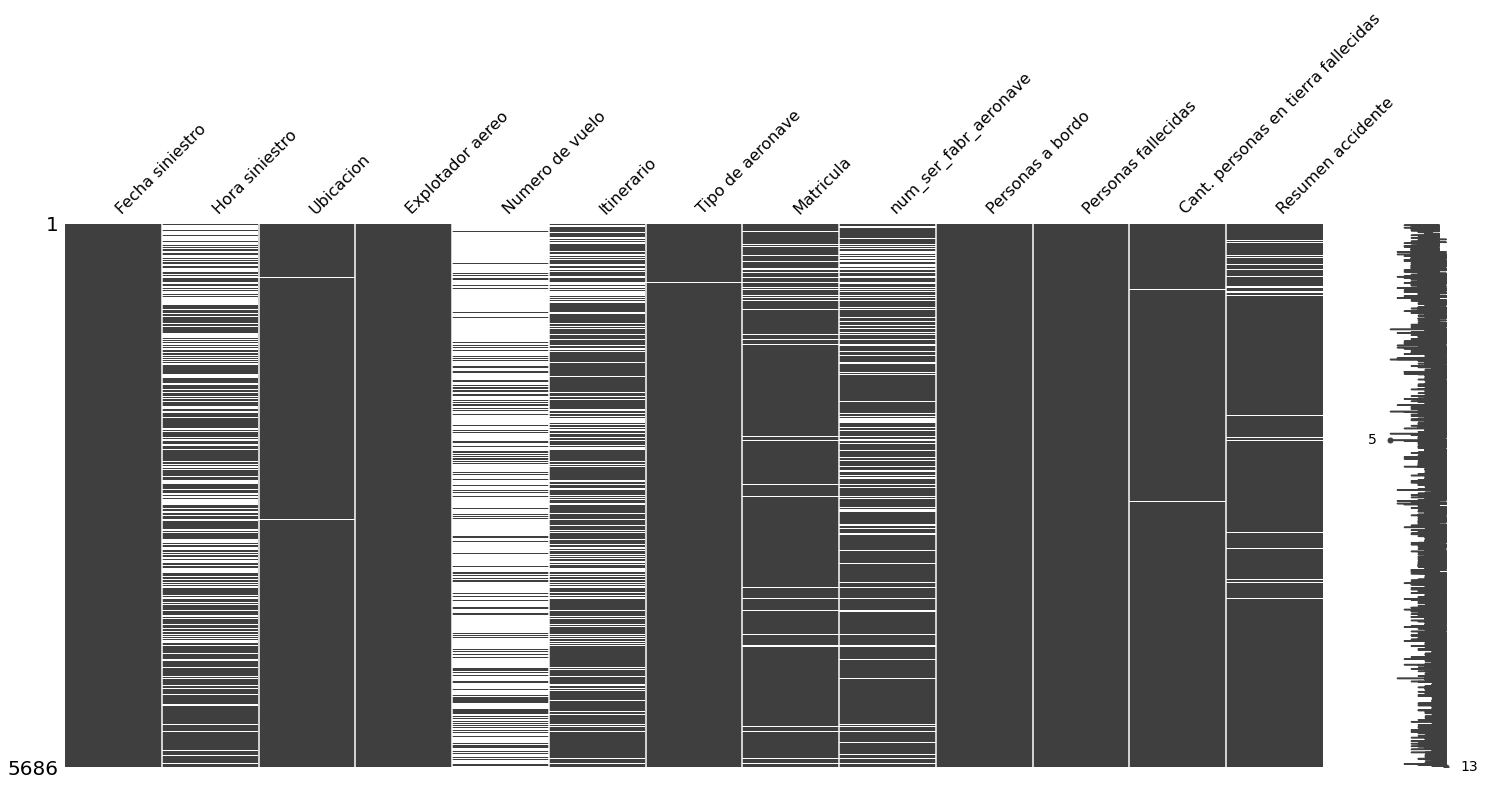

In [178]:
msno.matrix(aviones02)

***Vemos las primeras filas del archivo***

In [179]:
aviones02.head()

,Fecha siniestro,Hora siniestro,Ubicacion,Explotador aereo,Numero de vuelo,Itinerario,Tipo de aeronave,Matricula,num_ser_fabr_aeronave,Personas a bordo,Personas fallecidas,Cant. personas en tierra fallecidas,Resumen accidente
0,1921-02-03,NaN,"Mendotta, Minnisota",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,130,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,Shortly after takeoff from Minneapolis-World C...
1,1921-02-09,NaN,"La Crosse, Wisconsin",US Aerial Mail Service,NaN,NaN,Junkers F-13,301,NaN,3 (passengers:0 crew:3),3 (passengers:0 crew:3),0.0,Crashed for unknown reasons. Both pilots and t...
2,1921-02-15,NaN,Off Gibraltar,Aeropostale,NaN,NaN,Breguet 14,F-ALBA,NaN,2 (passengers:0 crew:2),2 (passengers:0 crew:2),0.0,The mail fligh encountered poor weather condit...
3,1921-02-22,NaN,"Elko, Nevada",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,67,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,"Shortly after taking off, the aircraft stalled..."
4,1921-04-06,NaN,"Point Cook, Australia",Military - Royal Australian Air Force,NaN,NaN,Avro 504,H3021,NaN,2 (passengers:0 crew:0),2 (passengers:0 crew:0),0.0,"Shortly after taking off on a training flight,..."


In [180]:
aviones02 = aviones02.replace(np.nan , 'Sin dato')

In [181]:
aviones02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Fecha siniestro                       5686 non-null   object
 1   Hora siniestro                        5686 non-null   object
 2   Ubicacion                             5686 non-null   object
 3   Explotador aereo                      5686 non-null   object
 4   Numero de vuelo                       5686 non-null   object
 5   Itinerario                            5686 non-null   object
 6   Tipo de aeronave                      5686 non-null   object
 7   Matricula                             5686 non-null   object
 8   num_ser_fabr_aeronave                 5686 non-null   object
 9   Personas a bordo                      5686 non-null   object
 10  Personas fallecidas                   5686 non-null   object
 11  Cant. personas en tierra falle

In [182]:
#Levantando la conexion con mysql 
database_username='root' # Nombre de cliente en MySQL Workbrench
database_password='072030' # Contraseña de MySQL Workbrench
database_ip='localhost'
database_name='proyecto03_aviones' # Nombre de Base de datos a donde nos conectaremos
database_conection=db.create_engine(f'mysql+pymysql://{database_username}:{database_password}@{database_ip}/{database_name}')
conexion=database_conection.connect()
metadata=db.MetaData()

In [183]:
#Llevando el archivo a mysql
aviones.to_sql('avionesaccidentes', conexion)

5008

***El archivo CSV accidentes se cargo directamente del mysql workbench***

***El otro archivo CSV se importa directamente desde mysql***

In [ ]:
#Para finalizar sesion en mysql
conexion.close() 